In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


RSEED = 45

In [2]:
# import the modeling csv file
df_kickstarter = pd.read_csv('data/kickstarter_modeling.csv')
df_kickstarter.head()

,funding_goal,outcome,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,1000,0,39,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,80000,0,87,2009,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,20,1,8,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99,1,79,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1900,0,28,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# define the target and features
X = df_kickstarter.drop('outcome', axis=1)
y = df_kickstarter['outcome']
X.shape, y.shape

((331462, 196), (331462,))

In [4]:
# do the test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=RSEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248596, 196), (82866, 196), (248596,), (82866,))

In [5]:
# train model
boost = XGBClassifier()
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [6]:
# predictions
y_pred_train = boost.predict(X_train)
y_pred = boost.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

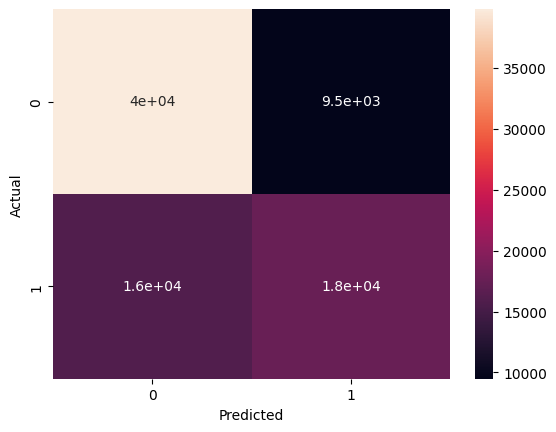

In [7]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

In [8]:
# function to display the scores
def get_scores(y_pred_train, y_pred, y_train=y_train, y_test=y_test):
    '''
    Getting all the scores to rate the model

    y_pred_train = predicted y of the training data
    
    y_pred = predicted y of the test data
    '''
    acc_train = accuracy_score(y_pred_train, y_train)
    acc = accuracy_score(y_pred, y_test)
    print(f'Train accuracy is : {acc_train}')
    print(f'Test accuracy is : {acc}')

    print('---' * 17)

    prec_train = precision_score(y_pred_train, y_train)
    prec = precision_score(y_pred, y_test)
    print(f'Train precision is : {prec_train}')
    print(f'Test precision is : {prec}')

    print('---' * 17)

    reca_train = recall_score(y_pred_train, y_train)
    reca = recall_score(y_pred, y_test)
    print(f'Train recall is : {reca_train}')
    print(f'Test recall is : {reca}')

    print('---' * 17)

    f1_train = f1_score(y_pred_train, y_train)
    f1 = f1_score(y_pred, y_test)
    print(f'Train f1 score is : {f1_train}')
    print(f'Test f1 score is : {f1}')

    print('---' * 17)

    roc_train = roc_auc_score(y_pred_train, y_train)
    roc = roc_auc_score(y_pred, y_test)
    print(f'Train roc_auc is : {roc_train}')
    print(f'Test roc_auc is : {roc}')

In [9]:
get_scores(y_pred_train, y_pred)

Train accuracy is : 0.701829474327825
Test accuracy is : 0.6926966427726692
---------------------------------------------------
Train precision is : 0.5381754735792622
Test precision is : 0.5238293940568091
---------------------------------------------------
Train recall is : 0.660035215573109
Test recall is : 0.6493866390777416
---------------------------------------------------
Train f1 score is : 0.5929086894915477
Test f1 score is : 0.5798894663037202
---------------------------------------------------
Train roc_auc is : 0.6911773425809962
Test roc_auc is : 0.6815443284632822


## Scaling the data

In [10]:
X_train.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
97463,2000,29,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141730,38000,37,2014,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
183714,47348,24,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208796,5000,59,2015,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
274154,2500,29,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# scaling the train data with standard scaler, I scaling the categories: funding_goal, funding_period and launch_year
col_scale = ['funding_goal', 'funding_period', 'launch_year']
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_train_preprocessed = np.concatenate([X_train_scaled, X_train.drop(col_scale, axis=1)], axis=1)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_train_preprocessed.columns = X_train.columns
X_train_preprocessed.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,0.000012,0.318681,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000228,0.406593,0.625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000285,0.263736,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000030,0.648352,0.750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000015,0.318681,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
X_test.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
259864,4000,29,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
75338,2000,29,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
179807,195909,29,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327632,1214,29,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
192323,1000,29,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# scaling the test data the same way
X_test_scaled = scaler.fit_transform(X_test[col_scale])
X_test_preprocessed = np.concatenate([X_test_scaled, X_test.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_test_preprocessed.columns = X_test.columns
X_test_preprocessed.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,0.000037,0.318681,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000019,0.318681,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.001825,0.318681,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.318681,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000009,0.318681,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
boost2 = XGBClassifier()
boost2.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
# predictions
y_pred_train_pros = boost2.predict(X_train_preprocessed)
y_pred_pros = boost2.predict(X_test_preprocessed)

<Axes: xlabel='Predicted', ylabel='Actual'>

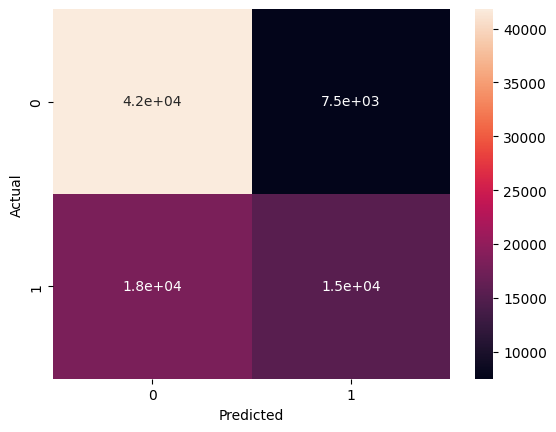

In [16]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_pros, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

In [17]:
get_scores(y_pred_train_pros, y_pred_pros)

Train accuracy is : 0.701829474327825
Test accuracy is : 0.6895349117852919
---------------------------------------------------
Train precision is : 0.5381754735792622
Test precision is : 0.45706536317844476
---------------------------------------------------
Train recall is : 0.660035215573109
Test recall is : 0.6712334763197059
---------------------------------------------------
Train f1 score is : 0.5929086894915477
Test f1 score is : 0.5438232530099119
---------------------------------------------------
Train roc_auc is : 0.6911773425809962
Test roc_auc is : 0.6838673212988066


It actually looks like the scaled data has actually worse outcome

## Starting the RandomSearches

In [18]:
# I will do a first round of randomized search to get better parameters

param_grid = {'max_depth': [2,4,3,6,10],
              'n_estimators': [10,20,30],
            }

# instantiate the search
rs = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='precision',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END ......max_depth=6, n_estimators=10;, score=0.645 total time=  53.7s
[CV 1/5] END ......max_depth=6, n_estimators=10;, score=0.645 total time=  54.0s
[CV 4/5] END ......max_depth=6, n_estimators=10;, score=0.647 total time=  54.4s
[CV 2/5] END ......max_depth=6, n_estimators=10;, score=0.652 total time=  54.9s
[CV 5/5] END ......max_depth=6, n_estimators=10;, score=0.643 total time=  55.2s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.660 total time=  31.0s
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.631 total time=  31.9s
[CV 1/5] END ......max_depth=3, n_estimators=30;, score=0.644 total time= 1.4min
[CV 2/5] END ......max_depth=3, n_estimators=30;, score=0.651 total time= 1.4min
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.653 total time=  31.8s
[CV 3/5] END ......max_depth=3, n_estimators=30;, score=0.653 total time= 1.4min
[CV 4/5] END ......max_depth=3, n_estimators=10;

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 3, 6, 10],
                                        'n_estimators': [10, 20, 30]},
                   random_state=45, scoring='precision', verbose=5)

In [19]:
# getting the best score
print('Best score:', round(rs.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs.best_params_)

Best score: 0.652
Best parameters:  {'n_estimators': 20, 'max_depth': 2}


In [20]:
# assingning the best fitted parameters
xgb_best = rs.best_estimator_

y_pred_test_rs = xgb_best.predict(X_test_preprocessed)

print('Extreme Gradient Boosting (XGBClassifier)')
print('=======================')
print('max_depth: {}'.format(xgb_best.max_depth))
print('n_estimators: {}'.format(xgb_best.n_estimators))

rxgb_precision = precision_score(y_test, y_pred_test_rs)
print('Test precision: {:2f}'.format(rxgb_precision))

Extreme Gradient Boosting (XGBClassifier)
max_depth: 2
n_estimators: 20
Test precision: 0.681514


<Axes: xlabel='Predicted', ylabel='Actual'>

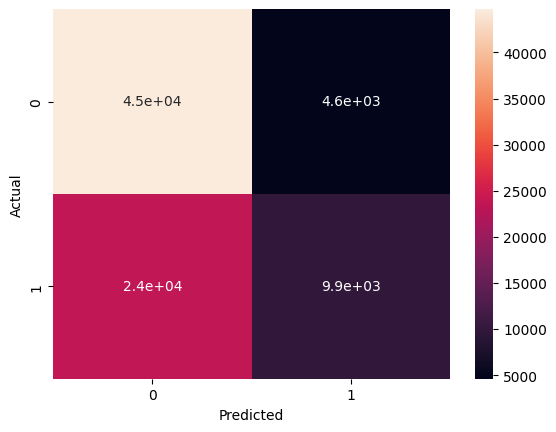

In [21]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_test_rs, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

## Ideas for more hyperparameters to tweak
- lambda, makes the model more conservative (L2 regularisation to decrease overfitting, use 0,1,3,5, default: 1)
- tree_method, tree construction algorithm (use auto, exact, approx, hist, default: auto)
- subsample, randomly subsample training data prior to growing trees (use 0, 0.5, 1, default: 1)
- booster, decide which booster to use (use gbtree, gblinear, dart, default: gbtree)


In [22]:
# Second round of randomized search to get better parameters

param_grid = {'max_depth': [1,2],
              'n_estimators': [20],
              'tree_method': ['auto', 'exact', 'approx', 'hist'],
              'subsample': [0.3,0.5,0.7,1],
              'booster': ['gbtree', 'gblinear', 'dart']
            }

# instantiate the search
rs2 = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='precision',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs2.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.653 total time=  27.4s
[CV 2/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.642 total time=  28.3s
[CV 1/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=exact;, score=0.650 total time=  28.4s
[CV 2/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=exact;, score=0.642 total time=  28.5s
[CV 3/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.641 total time=  28.6s
[CV 1/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.650 total time=  28.7s
[CV 5/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.627 total time=  28.7s
[CV 3/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'max_depth': [1, 2],
                                        'n_estimators': [20],
                                        'subsample': [0.3, 0.5, 0.7, 1],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=45, scoring='precision', verbose=5)

In [23]:
# getting the best score
print('Best score:', round(rs2.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs2.best_params_)

Best score: 0.654
Best parameters:  {'tree_method': 'approx', 'subsample': 0.3, 'n_estimators': 20, 'max_depth': 2, 'booster': 'dart'}


In [24]:
# assingning the best fitted parameters
xgb_best2 = rs2.best_estimator_

y_pred_test_rs2 = xgb_best2.predict(X_test_preprocessed)

print('Extreme Gradient Boosting (XGBClassifier)')
print('=======================')
print('max_depth: {}'.format(xgb_best2.max_depth))
print('n_estimators: {}'.format(xgb_best2.n_estimators))
print('tree_method: {}'.format(xgb_best2.tree_method))
print('subsample: {}'.format(xgb_best2.subsample))
print('booster: {}'.format(xgb_best2.booster))

rxgb_precision2 = precision_score(y_test, y_pred_test_rs2)
print('Test precision: {:2f}'.format(rxgb_precision2))

Extreme Gradient Boosting (XGBClassifier)
max_depth: 2
n_estimators: 20
tree_method: approx
subsample: 0.3
booster: dart
Test precision: 0.673304


<Axes: xlabel='Predicted', ylabel='Actual'>

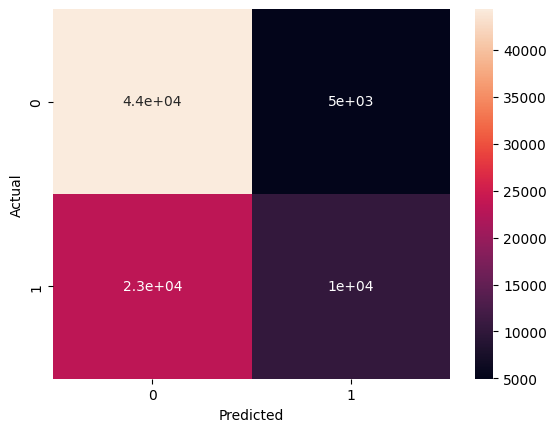

In [25]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_test_rs2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

In [26]:
# Third round of randomized search to get better parameters, since I have a looot of false negatives, I will try to see what a random search on f1 score will do

param_grid = {'max_depth': [1,2,3,4,6,10],
              'n_estimators': [10,20,30],
              'tree_method': ['auto', 'exact', 'approx', 'hist'],
              'subsample': [0.3,0.5,0.7,1],
              'booster': ['gbtree', 'gblinear', 'dart']
            }

# instantiate the search
rs3 = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='f1',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs3.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[01:24:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END booster=gblinear, max_depth=10, n_estimators=20, subsample=0.5, tree_method=hist;, score=nan total time=   2.6s
[01:24:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END booster=gblinear, max_depth=10, n_estimators=20, subsample=0.5, tree_method=hist;, score=nan total time=   2.7s
[01:24:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample", "tree_method" } are not used.

[CV 3/5] END booster=gblinear, max_depth=10, n_estimators=2

/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/pyth

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'max_depth': [1, 2, 3, 4, 6, 10],
                                        'n_estimators': [10, 20, 30],
                                        'subsample': [0.3, 0.5, 0.7, 1],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=45, scoring='f1', verbose=5)

In [27]:
# getting the best score
print('Best score:', round(rs3.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs3.best_params_)

Best score: 0.575
Best parameters:  {'tree_method': 'auto', 'subsample': 0.3, 'n_estimators': 30, 'max_depth': 10, 'booster': 'gbtree'}


In [28]:
# assingning the best fitted parameters
xgb_best3 = rs3.best_estimator_

y_pred_rs3 = xgb_best3.predict(X_train_preprocessed)
y_pred_test_rs3 = xgb_best3.predict(X_test_preprocessed)

print('Extreme Gradient Boosting (XGBClassifier)')
print('=======================')
print('max_depth: {}'.format(xgb_best3.max_depth))
print('n_estimators: {}'.format(xgb_best3.n_estimators))
print('tree_method: {}'.format(xgb_best3.tree_method))
print('subsample: {}'.format(xgb_best3.subsample))
print('booster: {}'.format(xgb_best3.booster))

rxgb_precision3_train = precision_score(y_train, y_pred_rs3)
print('Train precision: {:2f}'.format(rxgb_precision3_train))
rxgb_precision3 = precision_score(y_test, y_pred_test_rs3)
print('Test precision: {:2f}'.format(rxgb_precision3))
rxgb_f1score3 = f1_score(y_test, y_pred_test_rs3)
print('Test f1 score: {:2f}'.format(rxgb_f1score3))

Extreme Gradient Boosting (XGBClassifier)
max_depth: 10
n_estimators: 30
tree_method: auto
subsample: 0.3
booster: gbtree
Train precision: 0.658584
Test precision: 0.657538
Test f1 score: 0.537443


<Axes: xlabel='Predicted Labels', ylabel='True Labels'>

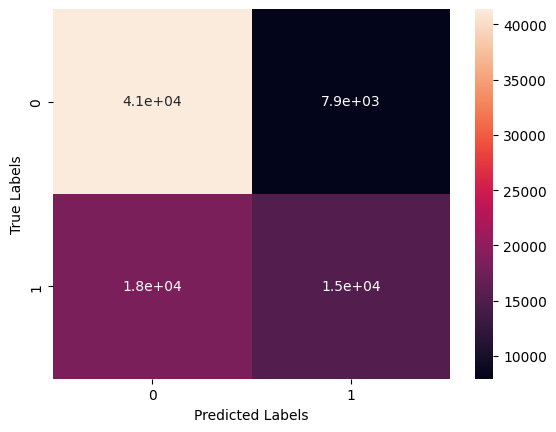

In [33]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_test_rs3, rownames=['True Labels'], colnames=['Predicted Labels'])
sns.heatmap(conf_matrix, annot=True)

In [30]:
# try to use the unscaled data
param_grid = {'max_depth': [2,4,3,6,10],
              'n_estimators': [10,20,50,100,150],
            }

# instantiate the search
rs5 = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='precision',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs5.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....max_depth=10, n_estimators=10;, score=0.643 total time=12.2min
[CV 3/5] END .....max_depth=10, n_estimators=10;, score=0.646 total time=12.2min
[CV 2/5] END .....max_depth=10, n_estimators=10;, score=0.646 total time=12.2min
[CV 5/5] END ......max_depth=6, n_estimators=20;, score=0.642 total time=28.0min
[CV 1/5] END ......max_depth=6, n_estimators=20;, score=0.646 total time=28.0min
[CV 2/5] END ......max_depth=6, n_estimators=20;, score=0.650 total time=28.1min
[CV 4/5] END ......max_depth=6, n_estimators=20;, score=0.647 total time=28.1min
[CV 3/5] END ......max_depth=6, n_estimators=20;, score=0.649 total time=28.1min
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.631 total time=  26.7s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.653 total time=  26.2s
[CV 4/5] END .....max_depth=10, n_estimators=10;, score=0.645 total time=16.9min
[CV 5/5] END .....max_depth=10, n_estimators=10;

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 3, 6, 10],
                                        'n_estimators': [10, 20, 50, 100, 150]},
                   random_state=45, scoring='precision', verbose=5)

In [31]:
# getting the best score
print('Best score:', round(rs5.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs5.best_params_)

Best score: 0.649
Best parameters:  {'n_estimators': 50, 'max_depth': 2}


In [32]:
# assingning the best fitted parameters
xgb_best5 = rs5.best_estimator_

y_pred_test_rs5 = xgb_best5.predict(X_test)

print('Extreme Gradient Boosting (XGBClassifier)')
print('=======================')
print('max_depth: {}'.format(xgb_best5.max_depth))
print('n_estimators: {}'.format(xgb_best5.n_estimators))

rxgb_precision5 = precision_score(y_test, y_pred_test_rs5)
print('Test precision: {:2f}'.format(rxgb_precision5))
rxgb_f1score5 = f1_score(y_test, y_pred_test_rs5)
print('Test f1 score: {:2f}'.format(rxgb_f1score5))

Extreme Gradient Boosting (XGBClassifier)
max_depth: 2
n_estimators: 50
Test precision: 0.649564
Test f1 score: 0.527553
